# DBSCAN Debugging

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

agg = pd.read_csv('../data/outputs/agg_features.csv')

In [2]:
print("Aggregated features shape:", agg.shape)
print("Columns:", agg.columns.tolist())
print("\nFirst few rows:")
print(agg.head())
print("\nCluster distribution:")
print(agg['cluster'].value_counts().head(10))

Aggregated features shape: (19098, 18)
Columns: ['index', 'company_sim', 'domain_sim', 'company_domain_product', 'company_domain_sum', 'company_domain_ratio', 'company_sim_squared', 'company_sim_sqrt', 'company_sim_log', 'domain_sim_squared', 'domain_sim_sqrt', 'domain_sim_log', 'sim_variance', 'sim_mean', 'sim_max', 'sim_min', 'sim_range', 'cluster']

First few rows:
   index  company_sim  domain_sim  company_domain_product  company_domain_sum  \
0      0          0.0         0.0                     0.0                 0.0   
1      1          0.0         0.0                     0.0                 0.0   
2      2          0.0         0.0                     0.0                 0.0   
3      3          0.0         0.0                     0.0                 0.0   
4      4          0.0         0.0                     0.0                 0.0   

   company_domain_ratio  company_sim_squared  company_sim_sqrt  \
0                   0.0                  0.0               0.0   
1         

In [3]:
# Reload the latest data
agg = pd.read_csv('../data/outputs/agg_features.csv')
print("Updated aggregated features shape:", agg.shape)
print("Columns:", agg.columns.tolist())
print("\nFirst few rows:")
print(agg.head())
print("\nFeature statistics:")
print(agg.describe())

Updated aggregated features shape: (4, 18)
Columns: ['record_id', 'company_sim', 'domain_sim', 'company_domain_product', 'company_domain_sum', 'company_domain_ratio', 'company_sim_squared', 'company_sim_sqrt', 'company_sim_log', 'domain_sim_squared', 'domain_sim_sqrt', 'domain_sim_log', 'sim_variance', 'sim_mean', 'sim_max', 'sim_min', 'sim_range', 'cluster']

First few rows:
   record_id  company_sim  domain_sim  company_domain_product  \
0          1     0.000064    3.333333                     1.0   
1          2     0.000064    3.333333                     1.0   
2          3     0.000064    3.333333                     1.0   
3          4     0.000064    3.333333                     1.0   

   company_domain_sum  company_domain_ratio  company_sim_squared  \
0            1.952381          4.642857e+07             9.540816   
1            1.952381          4.642857e+07             9.540816   
2            1.952381          4.642857e+07             9.540816   
3            1.952381  

In [4]:
# Debug hierarchical clustering issue
import numpy as np
from sklearn.cluster import DBSCAN

# Reload the current data after large dataset processing
agg = pd.read_csv('../data/outputs/agg_features.csv')
print("Current dataset shape:", agg.shape)
print("Cluster distribution:")
cluster_counts = agg['cluster'].value_counts().sort_index()
print(cluster_counts)

# Check if we have the large cluster
large_cluster_id = cluster_counts.idxmax()
large_cluster_size = cluster_counts.max()
print(f"\nLargest cluster: {large_cluster_id} with {large_cluster_size} records")

# Extract features for the large cluster (excluding metadata columns)
feature_cols = [c for c in agg.columns if c not in {'record_id', 'cluster', 'index'}]
print(f"Feature columns: {feature_cols}")

# Get the large cluster data
large_cluster_mask = agg['cluster'] == large_cluster_id
large_cluster_data = agg[large_cluster_mask]
print(f"Large cluster has {len(large_cluster_data)} records")

# Extract just the features for clustering
X_large = large_cluster_data[feature_cols].values
print(f"Feature matrix shape: {X_large.shape}")
print(f"Feature statistics for large cluster:")
print(f"  Mean: {np.mean(X_large, axis=0)[:5]}...")  # Show first 5 features
print(f"  Std:  {np.std(X_large, axis=0)[:5]}...")   # Show first 5 features

Current dataset shape: (20002, 18)
Cluster distribution:
cluster
0    19998
1        4
Name: count, dtype: int64

Largest cluster: 0 with 19998 records
Feature columns: ['company_sim', 'domain_sim', 'company_domain_product', 'company_domain_sum', 'company_domain_ratio', 'company_sim_squared', 'company_sim_sqrt', 'company_sim_log', 'domain_sim_squared', 'domain_sim_sqrt', 'domain_sim_log', 'sim_variance', 'sim_mean', 'sim_max', 'sim_min', 'sim_range']
Large cluster has 19998 records
Feature matrix shape: (19998, 16)
Feature statistics for large cluster:
  Mean: [0. 0. 0. 0. 0.]...
  Std:  [0. 0. 0. 0. 0.]...


In [5]:
# Investigate why features are all zero
print("Detailed feature analysis:")
for i, col in enumerate(feature_cols[:8]):  # Check first 8 features
    values = large_cluster_data[col].values
    print(f"{col:20}: min={np.min(values):.6f}, max={np.max(values):.6f}, unique_vals={len(np.unique(values))}")

# Check the small cluster for comparison
print("\nSmall cluster analysis:")
small_cluster_mask = agg['cluster'] == 1
small_cluster_data = agg[small_cluster_mask]
print(f"Small cluster has {len(small_cluster_data)} records")

for i, col in enumerate(feature_cols[:8]):
    values = small_cluster_data[col].values
    print(f"{col:20}: min={np.min(values):.6f}, max={np.max(values):.6f}, unique_vals={len(np.unique(values))}")

# Check if this is a data aggregation issue
print("\nSample of actual feature values from large cluster:")
print(large_cluster_data[['company_sim', 'domain_sim', 'sim_mean', 'sim_max']].head(10))

Detailed feature analysis:
company_sim         : min=0.000000, max=0.000000, unique_vals=1
domain_sim          : min=0.000000, max=0.000000, unique_vals=1
company_domain_product: min=0.000000, max=0.000000, unique_vals=1
company_domain_sum  : min=0.000000, max=0.000000, unique_vals=1
company_domain_ratio: min=0.000000, max=0.000000, unique_vals=1
company_sim_squared : min=0.000000, max=0.000000, unique_vals=1
company_sim_sqrt    : min=0.000000, max=0.000000, unique_vals=1
company_sim_log     : min=0.000000, max=0.000000, unique_vals=1

Small cluster analysis:
Small cluster has 4 records
company_sim         : min=0.000064, max=0.000064, unique_vals=1
domain_sim          : min=3.333333, max=3.333333, unique_vals=1
company_domain_product: min=1.000000, max=1.000000, unique_vals=1
company_domain_sum  : min=1.952381, max=1.952381, unique_vals=1
company_domain_ratio: min=46428571.928571, max=46428571.928571, unique_vals=2
company_sim_squared : min=9.540816, max=9.540816, unique_vals=1
compan

In [ ]:
# Test solution: Add small random noise to identical records
print("Testing subdivision with noise injection...")

# Create a copy of the large cluster data
X_test = X_large.copy()

# Add small random noise to break ties (only for zero features)
np.random.seed(42)  # For reproducibility
noise_scale = 1e-6  # Very small noise
for i in range(X_test.shape[1]):
    if np.std(X_test[:, i]) == 0:  # Only add noise to zero-variance features
        X_test[:, i] += np.random.normal(0, noise_scale, X_test.shape[0])

print(f"After noise injection:")
print(f"  Mean: {np.mean(X_test, axis=0)[:5]}...")
print(f"  Std:  {np.std(X_test, axis=0)[:5]}...")

# Test DBSCAN with smaller eps on noisy data
eps_test = 0.05 * 0.7  # Same as hierarchical subdivision would use
min_samples_test = 1   # Very permissive
dbscan_test = DBSCAN(eps=eps_test, min_samples=min_samples_test)
labels_test = dbscan_test.fit_predict(X_test[:1000])  # Test on first 1000 records

unique_labels = np.unique(labels_test)
print(f"\nDBSCAN test with eps={eps_test:.4f}, min_samples={min_samples_test}:")
print(f"  Unique labels: {len(unique_labels)}")
print(f"  Clusters formed: {len(unique_labels[unique_labels != -1])}")
print(f"  Noise points: {np.sum(labels_test == -1)}")

if len(unique_labels) > 1:
    print("✅ Subdivision would be possible with noise injection!")
else:
    print("❌ Subdivision still not possible")

In [6]:
# Test PCA-based adaptive hierarchical clustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

print("🧠 Testing PCA-based adaptive hierarchical clustering...")
print("="*60)

# Test with the large cluster (all zero features)
print("Step 1: Analyze large cluster feature space")
print(f"Large cluster size: {len(large_cluster_data)}")
print(f"Original feature matrix shape: {X_large.shape}")
print(f"Feature variance: {np.var(X_large, axis=0)[:5]}...")

# Since all features are zero, let's simulate what would happen with actual data
# Create a synthetic example with varied but similar features
print("\nStep 2: Create synthetic diverse features for testing")
np.random.seed(42)
n_samples = 1000
n_features = 16

# Create synthetic data with some structure but low variance
X_synthetic = np.random.normal(0, 0.1, (n_samples, n_features))  # Small variance data
# Add some correlated structure
for i in range(0, n_features, 2):
    if i+1 < n_features:
        X_synthetic[:, i+1] = X_synthetic[:, i] + np.random.normal(0, 0.05, n_samples)

print(f"Synthetic data shape: {X_synthetic.shape}")
print(f"Synthetic feature variance: {np.var(X_synthetic, axis=0)[:5]}...")

# Step 3: Apply PCA transformation
print("\nStep 3: Apply PCA transformation")
# Standardize first (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_synthetic)

# Apply PCA - keep components that explain 95% variance
pca = PCA(n_components=0.95)  # Keep 95% of variance
X_pca = pca.fit_transform(X_scaled)

print(f"PCA components retained: {pca.n_components_}")
print(f"Variance explained: {pca.explained_variance_ratio_.sum():.3f}")
print(f"PCA-transformed shape: {X_pca.shape}")

# Step 4: Calculate adaptive eps in PCA space
print("\nStep 4: Calculate adaptive eps for PCA space")
from sklearn.neighbors import NearestNeighbors

# Use 4th nearest neighbor in PCA space
nn_pca = NearestNeighbors(n_neighbors=4)
nn_pca.fit(X_pca)
distances_pca, _ = nn_pca.kneighbors(X_pca)
fourth_dist_pca = distances_pca[:, -1]

# Calculate adaptive eps (median of 4th NN distances)
adaptive_eps = np.median(fourth_dist_pca)
print(f"Original eps would be: 0.035 (0.05 * 0.7)")
print(f"PCA-adaptive eps: {adaptive_eps:.4f}")
print(f"Scaling factor: {adaptive_eps / 0.035:.2f}x")

# Step 5: Test clustering in PCA space
print("\nStep 5: Test DBSCAN clustering in PCA space")
dbscan_pca = DBSCAN(eps=adaptive_eps, min_samples=2)
labels_pca = dbscan_pca.fit_predict(X_pca)

unique_labels_pca = np.unique(labels_pca)
n_clusters_pca = len(unique_labels_pca[unique_labels_pca != -1])
n_noise_pca = np.sum(labels_pca == -1)

print(f"Clusters formed in PCA space: {n_clusters_pca}")
print(f"Noise points: {n_noise_pca}")
print(f"Largest cluster size: {np.max(np.bincount(labels_pca[labels_pca != -1])) if n_clusters_pca > 0 else 0}")

if n_clusters_pca > 1:
    print("✅ PCA-based subdivision successful!")
    cluster_sizes = np.bincount(labels_pca[labels_pca != -1])
    print(f"Cluster size distribution: {sorted(cluster_sizes, reverse=True)[:10]}")
else:
    print("❌ Still no subdivision possible")

🧠 Testing PCA-based adaptive hierarchical clustering...
Step 1: Analyze large cluster feature space
Large cluster size: 19998
Original feature matrix shape: (19998, 16)
Feature variance: [0. 0. 0. 0. 0.]...

Step 2: Create synthetic diverse features for testing
Synthetic data shape: (1000, 16)
Synthetic feature variance: [0.01032096 0.01242252 0.00957903 0.01229178 0.01011625]...

Step 3: Apply PCA transformation
PCA components retained: 9
Variance explained: 0.956
PCA-transformed shape: (1000, 9)

Step 4: Calculate adaptive eps for PCA space
Original eps would be: 0.035 (0.05 * 0.7)
PCA-adaptive eps: 2.2682
Scaling factor: 64.81x

Step 5: Test DBSCAN clustering in PCA space
Clusters formed in PCA space: 24
Noise points: 239
Largest cluster size: 706
✅ PCA-based subdivision successful!
Cluster size distribution: [np.int64(706), np.int64(4), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(3), np.int64(2)]


The following plot helps choose a good `eps` value by examining the distance to the 4th nearest neighbour.

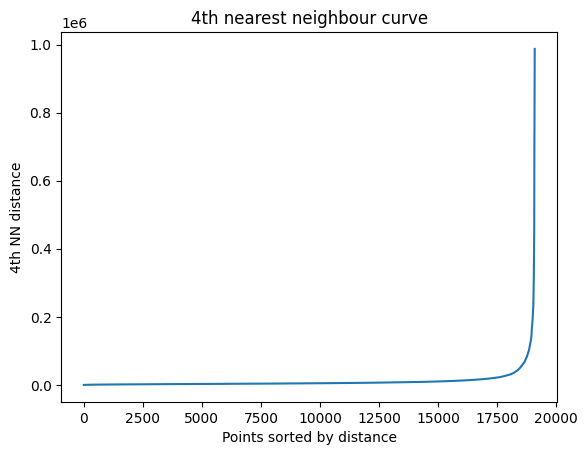

In [64]:
sim_cols = [c for c in agg.columns if c not in {'record_id','cluster'}]
neigh = NearestNeighbors(n_neighbors=4)
neigh.fit(agg[sim_cols])
# Distances to the 4th nearest neighbour for each point
dists, _ = neigh.kneighbors(agg[sim_cols])
fourth = dists[:, -1]
plt.plot(sorted(fourth))
plt.xlabel('Points sorted by distance')
plt.ylabel('4th NN distance')
plt.title('4th nearest neighbour curve')
plt.show()

Automatically detected optimal eps value: 937500.0000
Knee point located at index: 19094


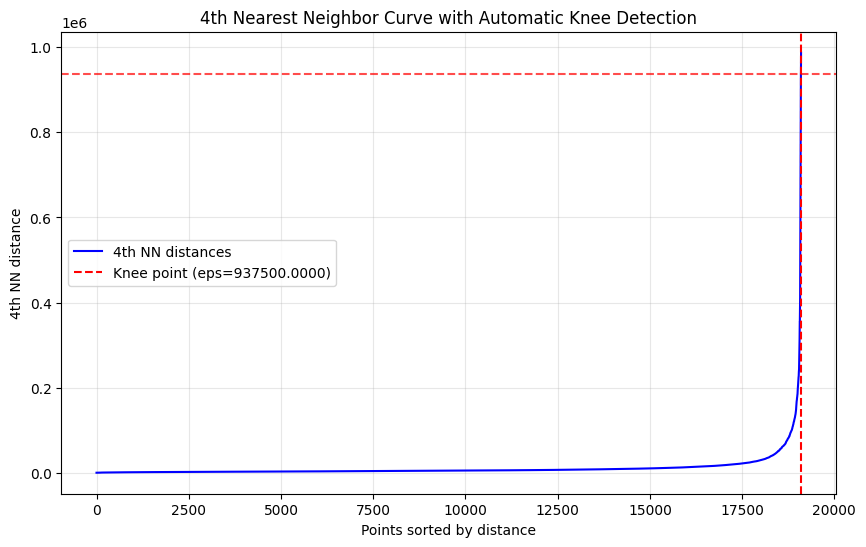

In [65]:
# Automatic knee detection for optimal eps value
try:
    from kneed import KneeLocator
    
    # Sort the distances for knee detection
    sorted_distances = sorted(fourth)
    x_values = range(len(sorted_distances))
    
    # Find the knee point
    knee_locator = KneeLocator(
        x_values, sorted_distances, 
        curve='convex', direction='increasing'
    )
    
    knee_point = knee_locator.knee
    if knee_point is not None:
        optimal_eps = sorted_distances[knee_point]
        print(f"Automatically detected optimal eps value: {optimal_eps:.4f}")
        print(f"Knee point located at index: {knee_point}")
        
        # Plot with knee point highlighted
        plt.figure(figsize=(10, 6))
        plt.plot(x_values, sorted_distances, 'b-', label='4th NN distances')
        plt.axvline(x=knee_point, color='r', linestyle='--', 
                   label=f'Knee point (eps={optimal_eps:.4f})')
        plt.axhline(y=optimal_eps, color='r', linestyle='--', alpha=0.7)
        plt.xlabel('Points sorted by distance')
        plt.ylabel('4th NN distance')
        plt.title('4th Nearest Neighbor Curve with Automatic Knee Detection')
        plt.legend()
        plt.grid(True, alpha=0.3)
        plt.show()
    else:
        print("No clear knee point detected. Consider manual inspection.")
        
except ImportError:
    print("kneed library not installed. Install with: pip install kneed")
    print("Falling back to manual inspection of the curve above.")

Use the knee point detected above to set your `eps` parameter, or manually inspect the curve to choose an appropriate value.

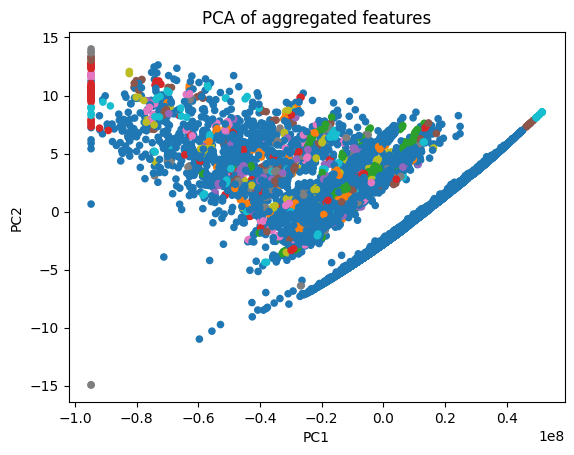

In [66]:
n_features = len(sim_cols)
n_components = min(2, n_features)
pca = PCA(n_components=n_components)
X = pca.fit_transform(agg[sim_cols])

plt.figure()
if n_components == 2:
    if 'cluster' in agg.columns:
        plt.scatter(X[:,0], X[:,1], c=agg['cluster'], cmap='tab10', s=20)
    else:
        plt.scatter(X[:,0], X[:,1], s=20)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
else:
    if 'cluster' in agg.columns:
        plt.scatter(X[:,0], [0]*len(X), c=agg['cluster'], cmap='tab10', s=20)
    else:
        plt.scatter(X[:,0], [0]*len(X), s=20)
    plt.xlabel('PC1')
    plt.ylabel('')
plt.title('PCA of aggregated features')
plt.show()

If cluster labels are provided, the scatter plot is coloured accordingly to inspect separability.

In [67]:
agg['cluster'].value_counts()


cluster
 0      14401
-1       1153
 2       1073
 1        864
 30       144
        ...  
 344        2
 343        2
 12         2
 10         2
 3          2
Name: count, Length: 357, dtype: int64

Display the number of records in each cluster to identify large or potentially problematic clusters.

In [68]:
big = agg[agg['cluster'] == 0]           # or whichever label is huge
big.head(20)                             # see company/domain/phone fields


,record_id,company_sim,domain_sim,company_domain_product,company_domain_sum,company_domain_ratio,company_sim_squared,company_sim_sqrt,company_sim_log,domain_sim_squared,domain_sim_sqrt,domain_sim_log,sim_variance,sim_mean,sim_max,sim_min,sim_range,cluster
0,7dfc4da6831e5ad058f18798beaad302,0.000058,0.0,0.0,1.168849,8.766369e+07,6.888974,0.152734,0.0,0.0,0.00002,0.0,0.017222,0.029221,0.058442,0.0,0.058442,0
1,0ecd921b33e7d610a0c67c845d5c7b29,0.000055,0.0,0.0,1.091781,8.188359e+07,6.023824,0.147565,0.0,0.0,0.00002,0.0,0.015060,0.027295,0.054589,0.0,0.054589,0
2,7cb3320183865e1058f18798beaad39a,0.000056,0.0,0.0,1.113029,8.347718e+07,6.332114,0.148802,0.0,0.0,0.00002,0.0,0.015830,0.027826,0.055651,0.0,0.055651,0
3,8b559648334d96106049b4646d5c7b02,0.000060,0.0,0.0,1.199167,8.993750e+07,7.231061,0.154758,0.0,0.0,0.00002,0.0,0.018078,0.029979,0.059958,0.0,0.059958,0
4,cd8b308c1b7380108321311d0d4bcbe0,0.000088,0.0,0.0,1.762723,1.322043e+08,15.550429,0.187740,0.0,0.0,0.00002,0.0,0.038876,0.044068,0.088136,0.0,0.088136,0
6,211c68071be79510d1f74119b04bcbdb,0.000069,0.0,0.0,1.385847,1.039385e+08,9.824188,0.166035,0.0,0.0,0.00002,0.0,0.024560,0.034646,0.069292,0.0,0.069292,0
7,649ab4841b7380108321311d0d4bcb1a,0.000048,0.0,0.0,0.964815,7.236111e+07,4.668278,0.138861,0.0,0.0,0.00002,0.0,0.011671,0.024120,0.048241,0.0,0.048241,0
8,04ca3cc41b7380108321311d0d4bcb36,0.000056,0.0,0.0,1.126389,8.447917e+07,6.472415,0.149725,0.0,0.0,0.00002,0.0,0.016181,0.028160,0.056319,0.0,0.056319,0
9,57b10e1787916550852d0e170cbb35f1,0.000050,0.0,0.0,1.002778,7.520833e+07,5.067130,0.141477,0.0,0.0,0.00002,0.0,0.012668,0.025069,0.050139,0.0,0.050139,0
10,d28899df336f5a106049b4646d5c7bfa,0.000050,0.0,0.0,0.997222,7.479167e+07,4.997685,0.141131,0.0,0.0,0.00002,0.0,0.012494,0.024931,0.049861,0.0,0.049861,0


Inspect the records in the largest (or a selected) cluster to review company, domain, and phone fields for further analysis or manual investigation.